In [2]:
!pip install --upgrade tables

     |████████████████████████████████| 4.3MB 2.8MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car"

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car


In [8]:
ls data/car.h5

data/car.h5


In [10]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

In [12]:
#wykorzystamy te dane do wizualizacji
#na poczatek zobaczmy jakie mamy kolumny
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

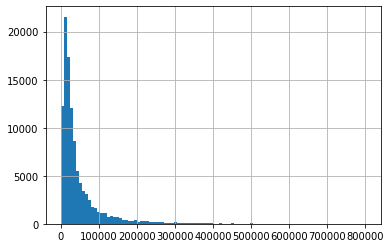

In [14]:
#będziemy prognozować wartość 'price_value'
df['price_value'].hist(bins=100)

In [16]:
#najdroższy samochów kosztuje
df['price_value'].max()

799900.0

In [18]:
#wiekszość samochodów mieści się w przedziale do 50k
#mediana, czyli 50% samochodów miesci sie w przedziele do 25,5k
df['price_value'].describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [19]:
#znajdzmy parametry po których bedziemy grupowac: year, marka..
df['param_marka-pojazdu'].unique()

array(['Dacia', 'Peugeot', 'Porsche', 'Volkswagen', 'Škoda', 'Jeep',
       'Renault', 'Opel', 'Volvo', 'Audi', 'BMW', 'Toyota', 'Kia',
       'Hyundai', 'Citroën', 'Nissan', 'Daewoo', 'Fiat', 'Mercedes-Benz',
       'Mini', 'Ford', 'Chevrolet', 'Infiniti', 'Suzuki', 'Lexus', 'Seat',
       'Mitsubishi', 'SsangYong', 'Mazda', 'Alfa Romeo', 'Saab', 'Dodge',
       'Jaguar', 'Honda', 'Smart', 'Land Rover', 'Chrysler',
       'Aston Martin', 'Subaru', 'Piaggio', 'Daihatsu', 'Cadillac',
       'Lada', 'Iveco', 'Lincoln', 'Inny', 'Lancia', 'Yugo', 'Pontiac',
       'MG', 'Scion', None, 'Hummer', 'Polonez', 'Maybach', 'Maserati',
       'Aixam', 'Bentley', 'Lamborghini', 'Isuzu', 'Gaz', 'Rover',
       'Wartburg', 'Mercury', 'Ferrari', 'Oldsmobile', 'Rolls-Royce',
       'Moskwicz', 'Ligier', 'Vauxhall', 'Tesla', 'Microcar', 'Acura',
       'Buick', 'Tarpan', 'Uaz', 'McLaren', 'GMC', 'Warszawa', 'Morgan',
       'Żuk', 'Tata', 'Brilliance', 'Triumph', 'Chatenet', 'Zastava',
       'Wołga', '

In [21]:
#marka samochodu wpływa na cene dlatego pogrupujmy po marce i wyliczmy wartość srednia dla marki
df.groupby('param_marka-pojazdu')['price_value'].mean()

param_marka-pojazdu
Acura         32349.250000
Aixam         26129.208955
Alfa Romeo    52053.311086
Aro           20800.000000
Asia          12500.000000
                  ...     
Yugo          47500.000000
Zaporożec      3900.000000
Zastava        2999.000000
Škoda         40068.437434
Żuk            4722.500000
Name: price_value, Length: 100, dtype: float64

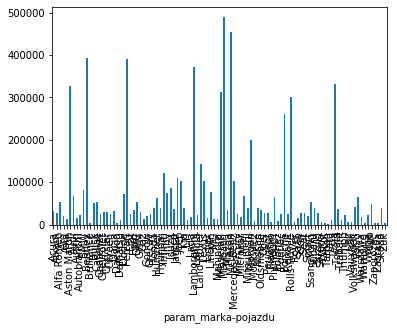

In [23]:
#Zrobmy to samo ale bardziej uniwersalnie
df.groupby('param_marka-pojazdu')['price_value'].agg(np.mean).plot(kind='bar')

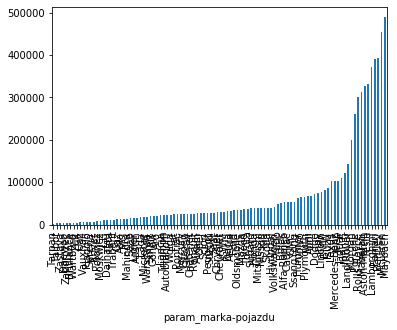

In [26]:
#zróbmy ten wykres bardziej czytelny
(
  df
 .groupby('param_marka-pojazdu')['price_value']
 .agg(np.mean)
 .sort_values()
 .plot(kind='bar')
)

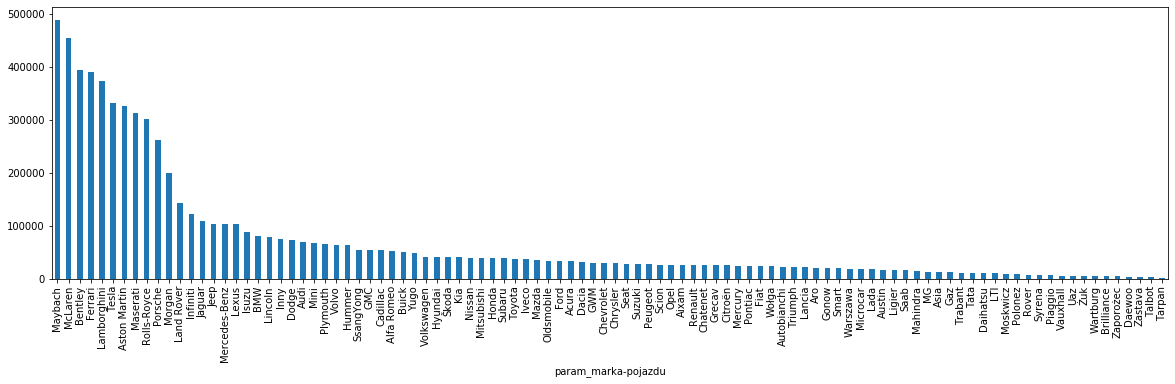

In [31]:
(
  df
 .groupby('param_marka-pojazdu')['price_value']
 .agg(np.mean)
 .sort_values(ascending=False)
) .plot(kind='bar', figsize=(20, 5))

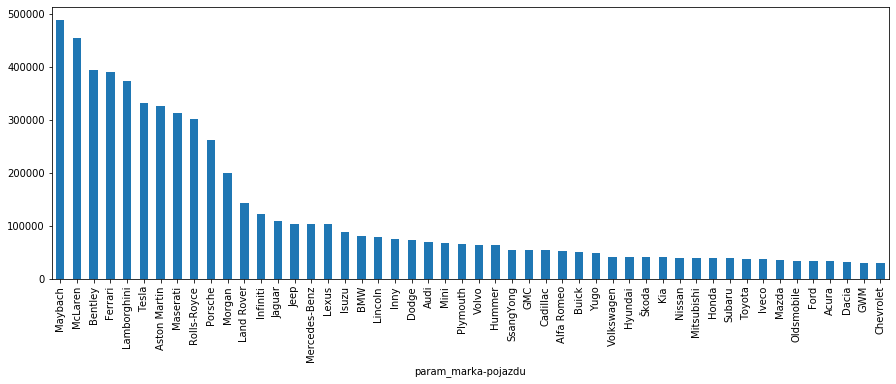

In [34]:
#zostawmy 50 najdrozszych marek
(
  df
 .groupby('param_marka-pojazdu')['price_value']
 .agg(np.mean)
 .sort_values(ascending=False)
 .head(50)
) .plot(kind='bar', figsize=(15, 5))

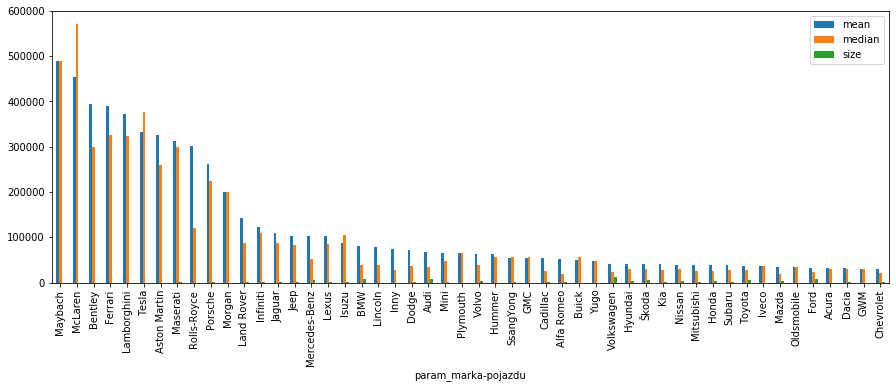

In [42]:
#zrobimy teraz eksperyment. bedziemy patrzyli na wartosc srednia ale i na to ile takich wystapien jest.
(
  df
 .groupby('param_marka-pojazdu')['price_value']
 .agg([np.mean, np.median, np.size])
 .sort_values(by='mean', ascending=False)
 .head(50)
) .plot(kind='bar', figsize=(15, 5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6938e3bdd8>,
      dtype=object)

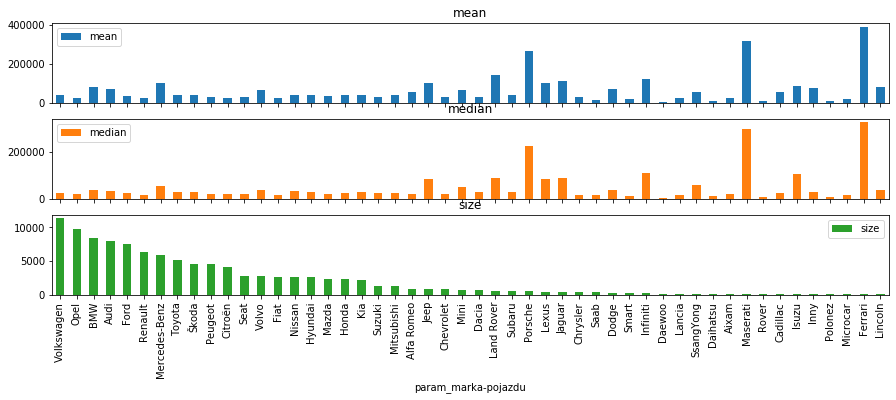

In [44]:
#widzimy ze Maybach ma najwyzsza wartosc srednia ale jest ich bardzo malo. McLaren wartosc srednia i mediana bardzo sie roznia.
#rozbijmy jeszcze analizę na 3 wykresy i posortujmy po ilosci wystapien
(
  df
 .groupby('param_marka-pojazdu')['price_value']
 .agg([np.mean, np.median, np.size])
 .sort_values(by='size', ascending=False)
 .head(50)
) .plot(kind='bar', figsize=(15, 5), subplots=True)

In [0]:
#refactoring - sprzatanie w kodzie
def group_and_barplot(feat_groupby, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort='mean',top=50, subplots=True):
  return (
      df
      .groupby(feat_groupby)[feat_agg]
      .agg(agg_funcs)
      .sort_values(by=feat_sort, ascending=False)
      .head(top)
      ) .plot(kind='bar', figsize=(15, 5), subplots=subplots)

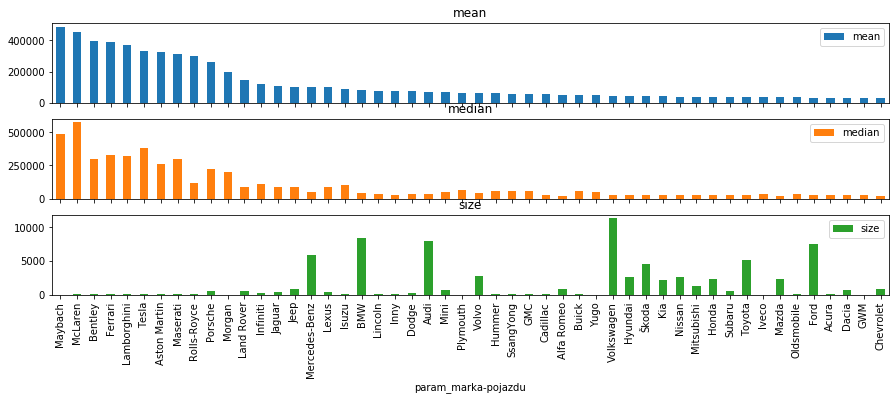

In [54]:
group_and_barplot('param_marka-pojazdu');

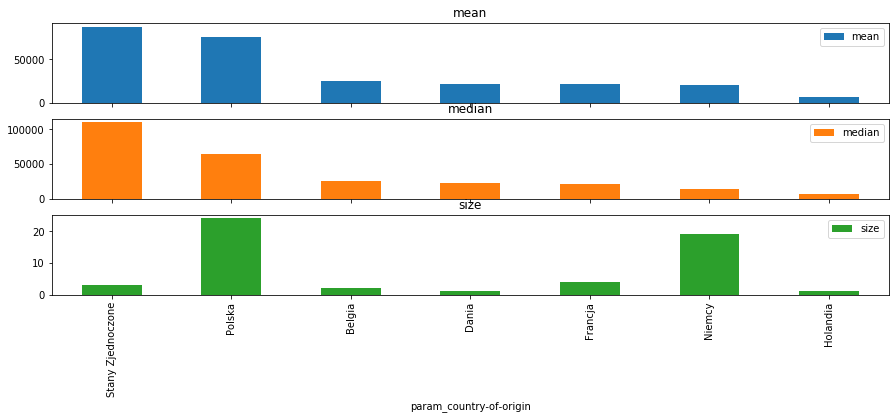

In [55]:
#zobaczmy teraz jakie jeszcze mamy parametry i spróbujmy je wykorzystac: kraj pochodzenia i kolor

group_and_barplot('param_country-of-origin');

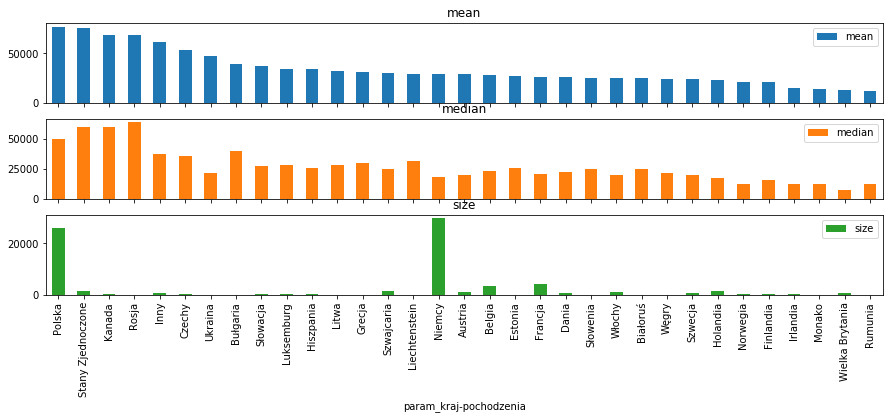

In [56]:
group_and_barplot('param_kraj-pochodzenia');

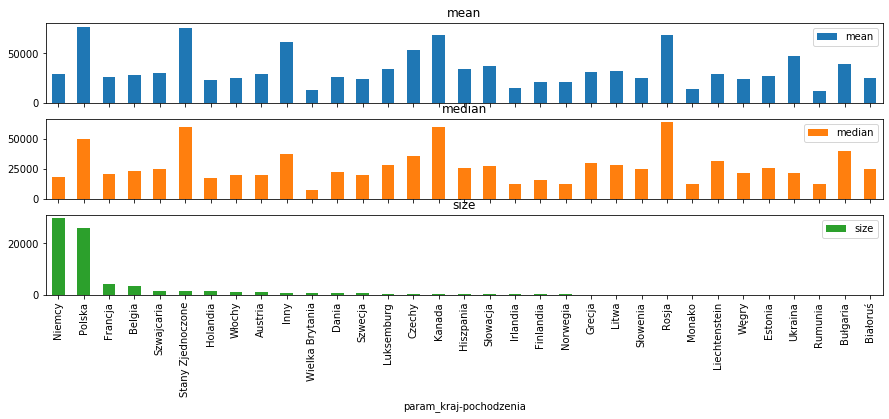

In [61]:
group_and_barplot('param_kraj-pochodzenia', feat_sort='size');

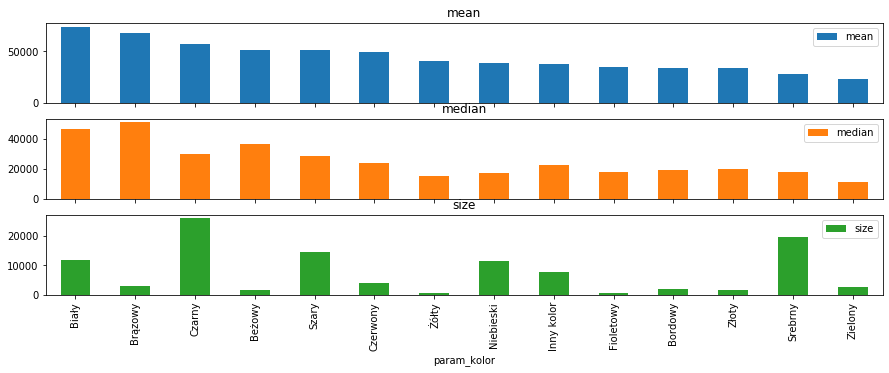

In [64]:
#najwiecej sprzedawanych jest samochodów z Niemiec i Polski
#sprawdzamy jeszcze kolor
group_and_barplot('param_kolor', feat_sort='mean');